This script can be used to compare the fMRI activation patterns with the CapsNet activations/reconstructions.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from tensorflow import keras
from keras import *
import tensorflow as tf

Drive with activation patterns of early visual areas needs to be mounted.

In [2]:
%load_ext tensorboard
import datetime
from google.colab import drive
import os

drive.mount('/content/drive')
%cd '/content/drive/My Drive/CapsNets/fMRI Data/Early visual areas'
#log_dir = "/content/drive/My Drive/CapsNets/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#os.makedirs(log_dir, exist_ok=True)
#%tensorboard --port=6008 --logdir {log_dir}

Mounted at /content/drive
/content/drive/My Drive/CapsNets/fMRI Data/Early visual areas


This package helps reading MATLAB data files.

In [3]:
!pip install mat73

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


These are the activation patterns without pRF mapping and autoencoder use for imagery:

In [4]:
import mat73
V1 = mat73.loadmat('V1.mat')
V2 = mat73.loadmat('V2.mat')
V3 = mat73.loadmat('V3.mat')

These are the files which indicate the activation patterns for reconstructed and autoencoded imagery trials:

In [5]:
V1_recon = mat73.loadmat('V1_Ima_recon.mat')
V2_recon = mat73.loadmat('V2_Ima_recon.mat')
V3_recon = mat73.loadmat('V3_Ima_recon.mat')

Raw activation patterns from perception trials:

In [6]:
V1_perc = mat73.loadmat('V1_Perc.mat')
V2_perc = mat73.loadmat('V2_Perc.mat')
V3_perc = mat73.loadmat('V3_Perc.mat')

Reconstructed activation patterns from perception trials:

In [7]:
V1_perc_recon = mat73.loadmat('V1_Perc_recon_av.mat')
V2_perc_recon = mat73.loadmat('V2_Perc_recon_av.mat')
V3_perc_recon = mat73.loadmat('V3_Perc_recon_av.mat')

# Import steps for V1

These are the trial by trial activations without the processing through the autoencoder nor the pRF mapping. 

In [10]:
V1_imagery_raw = np.zeros((0,207,6073))
V1_imagery_raw_lower = np.zeros((0,32))
V1_imagery_raw_upper = np.zeros((0,32))
V1_imagery_labels = np.zeros((0,32))

for run in range(4):
  V1_imagery_raw = np.append(V1_imagery_raw, V1['Imagery']['Run'][run]['Data'].reshape(1,V1['Imagery']['Run'][run]['Data'].shape[0], V1['Imagery']['Run'][run]['Data'].shape[1]), axis = 0)
  V1_imagery_raw_lower = np.append(V1_imagery_raw_lower, V1['Imagery']['Run'][run]['Bounds']['lower'].reshape(1, V1['Imagery']['Run'][run]['Bounds']['lower'].shape[0]), axis = 0)
  V1_imagery_raw_upper = np.append(V1_imagery_raw_upper, V1['Imagery']['Run'][run]['Bounds']['upper'].reshape(1, V1['Imagery']['Run'][run]['Bounds']['upper'].shape[0]), axis = 0)
  V1_imagery_labels = np.append(V1_imagery_labels, V1['Imagery']['Run'][run]['Code'].reshape(1, V1['Imagery']['Run'][run]['Code'].shape[0]), axis = 0)

This code averages all the trial from one letter to represent the average activation pattern for imagery trials.

In [11]:
extracted_trials = np.zeros((4,32,6073))
id_s = 0
id_h = 0
id_t = 0
id_c = 0

V1_h_imagery = np.zeros((32,6073))
V1_t_imagery = np.zeros((32,6073))
V1_s_imagery = np.zeros((32,6073))
V1_c_imagery = np.zeros((32,6073))

for run in range(4):
  for trial in range(32):
    extracted_trials[run][trial] = np.mean(V1_imagery_raw[run][int(V1_imagery_raw_lower[run][trial])-1:int(V1_imagery_raw_upper[run][trial])], axis = 0)
    if V1_imagery_labels[run][trial] == 1:
      V1_h_imagery[id_h] = np.mean(V1_imagery_raw[run][int(V1_imagery_raw_lower[run][trial])-1:int(V1_imagery_raw_upper[run][trial])], axis = 0)
      id_h += 1
    elif V1_imagery_labels[run][trial] == 2:
      V1_t_imagery[id_t] = np.mean(V1_imagery_raw[run][int(V1_imagery_raw_lower[run][trial])-1:int(V1_imagery_raw_upper[run][trial])], axis = 0)
      id_t +=1
    elif V1_imagery_labels[run][trial] == 3:
      V1_s_imagery[id_s] = np.mean(V1_imagery_raw[run][int(V1_imagery_raw_lower[run][trial])-1:int(V1_imagery_raw_upper[run][trial])], axis = 0)
      id_s +=1
    elif V1_imagery_labels[run][trial] == 4:
      V1_c_imagery[id_c] = np.mean(V1_imagery_raw[run][int(V1_imagery_raw_lower[run][trial])-1:int(V1_imagery_raw_upper[run][trial])], axis = 0)
      id_c +=1
    else:
      print('something weird happend', V1_imagery_labels[run][trial])

In [12]:
V1_c_av = np.mean(V1_c_imagery,axis = 0)
V1_h_av = np.mean(V1_h_imagery,axis = 0)
V1_s_av = np.mean(V1_s_imagery,axis = 0)
V1_t_av = np.mean(V1_t_imagery,axis = 0)

Nur zum Verständnis des Aufbaus des Dictionaries:

In [13]:
V1_recon['data']['Run']['letter'][0] #first number = run, second number = letter, 0 = H, 1 = T, 2 = S, 3 = C

array([[0.29100966, 0.29004583, 0.28907213, ..., 0.22521089, 0.22714223,
        0.2290948 ],
       [0.19873412, 0.19945839, 0.20014969, ..., 0.15525283, 0.15397705,
        0.15268868],
       [0.21226832, 0.21194702, 0.2116152 , ..., 0.15129696, 0.15110604,
        0.15094101],
       [0.2734849 , 0.2722251 , 0.2709757 , ..., 0.18055253, 0.18320398,
        0.18596695]], dtype=float32)

Imagery trials after reconstruction (150 x 150 resolution pictures)

In [14]:
V1_h_imagery_recon = np.zeros((0,22500))
V1_t_imagery_recon = np.zeros((0,22500))
V1_s_imagery_recon = np.zeros((0,22500))
V1_c_imagery_recon = np.zeros((0,22500))

for run in range(4):
    V1_h_imagery_recon = np.append(V1_h_imagery_recon, V1_recon['data']['Run']['letter'][run][0].reshape(1,22500), axis = 0)
    V1_t_imagery_recon = np.append(V1_t_imagery_recon, V1_recon['data']['Run']['letter'][run][1].reshape(1,22500), axis = 0)
    V1_s_imagery_recon = np.append(V1_s_imagery_recon, V1_recon['data']['Run']['letter'][run][2].reshape(1,22500), axis = 0)
    V1_c_imagery_recon = np.append(V1_c_imagery_recon, V1_recon['data']['Run']['letter'][run][3].reshape(1,22500), axis = 0)

V1_recon_c_av = np.mean(V1_c_imagery_recon, axis = 0)
V1_recon_h_av = np.mean(V1_h_imagery_recon, axis = 0)
V1_recon_s_av = np.mean(V1_s_imagery_recon, axis = 0)
V1_recon_t_av = np.mean(V1_t_imagery_recon, axis = 0)

Perception trials before reconstruction. Voxel activation patterns.

In [15]:
V1_perc_h = np.zeros((0,12146))
V1_perc_t = np.zeros((0,12146))
V1_perc_s = np.zeros((0,12146))
V1_perc_c = np.zeros((0,12146))

for run in range(4):
  for trial in range(8):
    V1_perc_h = np.append(V1_perc_h, V1_perc['percdata_before']['roi']['letter']['trial'][0][trial].reshape(1,12146), axis = 0)
    V1_perc_t = np.append(V1_perc_t, V1_perc['percdata_before']['roi']['letter']['trial'][1][trial].reshape(1,12146), axis = 0)
    V1_perc_s = np.append(V1_perc_s, V1_perc['percdata_before']['roi']['letter']['trial'][2][trial].reshape(1,12146), axis = 0)
    V1_perc_c = np.append(V1_perc_c, V1_perc['percdata_before']['roi']['letter']['trial'][3][trial].reshape(1,12146), axis = 0)

V1_perc_h_av = np.mean(V1_perc_h,axis = 0)
V1_perc_t_av = np.mean(V1_perc_t,axis = 0)
V1_perc_s_av = np.mean(V1_perc_s,axis = 0)
V1_perc_c_av = np.mean(V1_perc_c,axis = 0)

#V1_perc['percdata']['roi']['letter']['trial'][3]['activation'][trial]

Perception trials after reconstruction.

In [16]:
V1_perc_recon_h = V1_perc_recon['VF'][:,0]
V1_perc_recon_t = V1_perc_recon['VF'][:,1]
V1_perc_recon_s = V1_perc_recon['VF'][:,2]
V1_perc_recon_c = V1_perc_recon['VF'][:,3]

# Import steps for V2

In [17]:
V2_imagery_raw = np.zeros((0,207,5950))
V2_imagery_raw_lower = np.zeros((0,32))
V2_imagery_raw_upper = np.zeros((0,32))
V2_imagery_labels = np.zeros((0,32))

for run in range(4):
  V2_imagery_raw = np.append(V2_imagery_raw, V2['Imagery']['Run'][run]['Data'].reshape(1,V2['Imagery']['Run'][run]['Data'].shape[0], V2['Imagery']['Run'][run]['Data'].shape[1]), axis = 0)
  V2_imagery_raw_lower = np.append(V2_imagery_raw_lower, V2['Imagery']['Run'][run]['Bounds']['lower'].reshape(1, V2['Imagery']['Run'][run]['Bounds']['lower'].shape[0]), axis = 0)
  V2_imagery_raw_upper = np.append(V2_imagery_raw_upper, V2['Imagery']['Run'][run]['Bounds']['upper'].reshape(1, V2['Imagery']['Run'][run]['Bounds']['upper'].shape[0]), axis = 0)
  V2_imagery_labels = np.append(V2_imagery_labels, V2['Imagery']['Run'][run]['Code'].reshape(1, V2['Imagery']['Run'][run]['Code'].shape[0]), axis = 0)

In [18]:
extracted_trials = np.zeros((4,32,5950))
id_s = 0
id_h = 0
id_t = 0
id_c = 0

V2_h_imagery = np.zeros((32,5950))
V2_t_imagery = np.zeros((32,5950))
V2_s_imagery = np.zeros((32,5950))
V2_c_imagery = np.zeros((32,5950))

for run in range(4):
  for trial in range(32):
    extracted_trials[run][trial] = np.mean(V2_imagery_raw[run][int(V2_imagery_raw_lower[run][trial])-1:int(V2_imagery_raw_upper[run][trial])], axis = 0)
    if V2_imagery_labels[run][trial] == 1:
      V2_h_imagery[id_h] = np.mean(V2_imagery_raw[run][int(V2_imagery_raw_lower[run][trial])-1:int(V2_imagery_raw_upper[run][trial])], axis = 0)
      id_h += 1
    elif V2_imagery_labels[run][trial] == 2:
      V2_t_imagery[id_t] = np.mean(V2_imagery_raw[run][int(V2_imagery_raw_lower[run][trial])-1:int(V2_imagery_raw_upper[run][trial])], axis = 0)
      id_t +=1
    elif V2_imagery_labels[run][trial] == 3:
      V2_s_imagery[id_s] = np.mean(V2_imagery_raw[run][int(V2_imagery_raw_lower[run][trial])-1:int(V2_imagery_raw_upper[run][trial])], axis = 0)
      id_s +=1
    elif V2_imagery_labels[run][trial] == 4:
      V2_c_imagery[id_c] = np.mean(V2_imagery_raw[run][int(V2_imagery_raw_lower[run][trial])-1:int(V2_imagery_raw_upper[run][trial])], axis = 0)
      id_c +=1
    else:
      print('something weird happend', V2_imagery_labels[run][trial])

In [19]:
V2_c_av = np.mean(V2_c_imagery,axis = 0)
V2_h_av = np.mean(V2_h_imagery,axis = 0)
V2_s_av = np.mean(V2_s_imagery,axis = 0)
V2_t_av = np.mean(V2_t_imagery,axis = 0)

In [20]:
V2_h_imagery_recon = np.zeros((0,22500))
V2_t_imagery_recon = np.zeros((0,22500))
V2_s_imagery_recon = np.zeros((0,22500))
V2_c_imagery_recon = np.zeros((0,22500))

for run in range(4):
    V2_h_imagery_recon = np.append(V2_h_imagery_recon, V2_recon['data']['Run']['letter'][run][0].reshape(1,22500), axis = 0)
    V2_t_imagery_recon = np.append(V2_t_imagery_recon, V2_recon['data']['Run']['letter'][run][1].reshape(1,22500), axis = 0)
    V2_s_imagery_recon = np.append(V2_s_imagery_recon, V2_recon['data']['Run']['letter'][run][2].reshape(1,22500), axis = 0)
    V2_c_imagery_recon = np.append(V2_c_imagery_recon, V2_recon['data']['Run']['letter'][run][3].reshape(1,22500), axis = 0)

#V1_recon['data']['ROI']['Run']['letter'][3]['trial'][3][0]

V2_recon_c_av = np.mean(V2_c_imagery_recon, axis = 0)
V2_recon_h_av = np.mean(V2_h_imagery_recon, axis = 0)
V2_recon_s_av = np.mean(V2_s_imagery_recon, axis = 0)
V2_recon_t_av = np.mean(V2_t_imagery_recon, axis = 0)

In [21]:
V2_perc_h = np.zeros((0,11900))
V2_perc_t = np.zeros((0,11900))
V2_perc_s = np.zeros((0,11900))
V2_perc_c = np.zeros((0,11900))

for run in range(4):
  for trial in range(8):
    V2_perc_h = np.append(V2_perc_h, V2_perc['percdata_before']['roi']['letter']['trial'][0][trial].reshape(1,11900), axis = 0)
    V2_perc_t = np.append(V2_perc_t, V2_perc['percdata_before']['roi']['letter']['trial'][1][trial].reshape(1,11900), axis = 0)
    V2_perc_s = np.append(V2_perc_s, V2_perc['percdata_before']['roi']['letter']['trial'][2][trial].reshape(1,11900), axis = 0)
    V2_perc_c = np.append(V2_perc_c, V2_perc['percdata_before']['roi']['letter']['trial'][3][trial].reshape(1,11900), axis = 0)

V2_perc_h_av = np.mean(V2_perc_h,axis = 0)
V2_perc_t_av = np.mean(V2_perc_t,axis = 0)
V2_perc_s_av = np.mean(V2_perc_s,axis = 0)
V2_perc_c_av = np.mean(V2_perc_c,axis = 0)

In [22]:
V2_perc_recon_h = V2_perc_recon['VF'][:,0]
V2_perc_recon_t = V2_perc_recon['VF'][:,1]
V2_perc_recon_s = V2_perc_recon['VF'][:,2]
V2_perc_recon_c = V2_perc_recon['VF'][:,3]

# Import Steps V3

In [23]:
V3_imagery_raw = np.zeros((0,207,4038))
V3_imagery_raw_lower = np.zeros((0,32))
V3_imagery_raw_upper = np.zeros((0,32))
V3_imagery_labels = np.zeros((0,32))

for run in range(4):
  V3_imagery_raw = np.append(V3_imagery_raw, V3['Imagery']['Run'][run]['Data'].reshape(1, V3['Imagery']['Run'][run]['Data'].shape[0], V3['Imagery']['Run'][run]['Data'].shape[1]), axis = 0)
  V3_imagery_raw_lower = np.append(V3_imagery_raw_lower, V3['Imagery']['Run'][run]['Bounds']['lower'].reshape(1, V3['Imagery']['Run'][run]['Bounds']['lower'].shape[0]), axis = 0)
  V3_imagery_raw_upper = np.append(V3_imagery_raw_upper, V3['Imagery']['Run'][run]['Bounds']['upper'].reshape(1, V3['Imagery']['Run'][run]['Bounds']['upper'].shape[0]), axis = 0)
  V3_imagery_labels = np.append(V3_imagery_labels, V3['Imagery']['Run'][run]['Code'].reshape(1, V3['Imagery']['Run'][run]['Code'].shape[0]), axis = 0)

In [24]:
extracted_trials = np.zeros((4,32,4038))
id_s = 0
id_h = 0
id_t = 0
id_c = 0

V3_h_imagery = np.zeros((32,4038))
V3_t_imagery = np.zeros((32,4038))
V3_s_imagery = np.zeros((32,4038))
V3_c_imagery = np.zeros((32,4038))

for run in range(4):
  for trial in range(32):
    extracted_trials[run][trial] = np.mean(V3_imagery_raw[run][int(V3_imagery_raw_lower[run][trial])-1:int(V3_imagery_raw_upper[run][trial])], axis = 0)
    if V3_imagery_labels[run][trial] == 1:
      V3_h_imagery[id_h] = np.mean(V3_imagery_raw[run][int(V3_imagery_raw_lower[run][trial])-1:int(V3_imagery_raw_upper[run][trial])], axis = 0)
      id_h += 1
    elif V3_imagery_labels[run][trial] == 2:
      V3_t_imagery[id_t] = np.mean(V3_imagery_raw[run][int(V3_imagery_raw_lower[run][trial])-1:int(V3_imagery_raw_upper[run][trial])], axis = 0)
      id_t +=1
    elif V3_imagery_labels[run][trial] == 3:
      V3_s_imagery[id_s] = np.mean(V3_imagery_raw[run][int(V3_imagery_raw_lower[run][trial])-1:int(V3_imagery_raw_upper[run][trial])], axis = 0)
      id_s +=1
    elif V3_imagery_labels[run][trial] == 4:
      V3_c_imagery[id_c] = np.mean(V3_imagery_raw[run][int(V3_imagery_raw_lower[run][trial])-1:int(V3_imagery_raw_upper[run][trial])], axis = 0)
      id_c +=1
    else:
      print('something weird happend', V3_imagery_labels[run][trial])

In [25]:
V3_c_av = np.mean(V3_c_imagery,axis = 0)
V3_h_av = np.mean(V3_h_imagery,axis = 0)
V3_s_av = np.mean(V3_s_imagery,axis = 0)
V3_t_av = np.mean(V3_t_imagery,axis = 0)

In [26]:
V3_h_imagery_recon = np.zeros((0,22500))
V3_t_imagery_recon = np.zeros((0,22500))
V3_s_imagery_recon = np.zeros((0,22500))
V3_c_imagery_recon = np.zeros((0,22500))

for run in range(4):
    V3_h_imagery_recon = np.append(V3_h_imagery_recon, V3_recon['data']['Run']['letter'][run][0].reshape(1,22500), axis = 0)
    V3_t_imagery_recon = np.append(V3_t_imagery_recon, V3_recon['data']['Run']['letter'][run][1].reshape(1,22500), axis = 0)
    V3_s_imagery_recon = np.append(V3_s_imagery_recon, V3_recon['data']['Run']['letter'][run][2].reshape(1,22500), axis = 0)
    V3_c_imagery_recon = np.append(V3_c_imagery_recon, V3_recon['data']['Run']['letter'][run][3].reshape(1,22500), axis = 0)

#V1_recon['data']['ROI']['Run']['letter'][3]['trial'][3][0]

V3_recon_c_av = np.mean(V3_c_imagery_recon, axis = 0)
V3_recon_h_av = np.mean(V3_h_imagery_recon, axis = 0)
V3_recon_s_av = np.mean(V3_s_imagery_recon, axis = 0)
V3_recon_t_av = np.mean(V3_t_imagery_recon, axis = 0)

In [27]:
V3_perc_h = np.zeros((0,8076))
V3_perc_t = np.zeros((0,8076))
V3_perc_s = np.zeros((0,8076))
V3_perc_c = np.zeros((0,8076))

for run in range(4):
  for trial in range(8):
    V3_perc_h = np.append(V3_perc_h, V3_perc['percdata_before']['roi']['letter']['trial'][0][trial].reshape(1,8076), axis = 0)
    V3_perc_t = np.append(V3_perc_t, V3_perc['percdata_before']['roi']['letter']['trial'][1][trial].reshape(1,8076), axis = 0)
    V3_perc_s = np.append(V3_perc_s, V3_perc['percdata_before']['roi']['letter']['trial'][2][trial].reshape(1,8076), axis = 0)
    V3_perc_c = np.append(V3_perc_c, V3_perc['percdata_before']['roi']['letter']['trial'][3][trial].reshape(1,8076), axis = 0)

V3_perc_h_av = np.mean(V3_perc_h,axis = 0)
V3_perc_t_av = np.mean(V3_perc_t,axis = 0)
V3_perc_s_av = np.mean(V3_perc_s,axis = 0)
V3_perc_c_av = np.mean(V3_perc_c,axis = 0)

In [28]:
V3_perc_recon_h = V3_perc_recon['VF'][:,0]
V3_perc_recon_t = V3_perc_recon['VF'][:,1]
V3_perc_recon_s = V3_perc_recon['VF'][:,2]
V3_perc_recon_c = V3_perc_recon['VF'][:,3]

# Import Reconstruction from Imagery Capsules

In [29]:
%cd '/content/drive/My Drive/CapsNets/'

/content/drive/My Drive/CapsNets


In [30]:
Caps_Imagery_V1 = np.loadtxt('Reconstruction_im.txt')

In [31]:
Caps_Imagery_V2 = np.loadtxt('V2_im_caps.txt')
Caps_Imagery_V3 = np.loadtxt('V3_im_caps.txt')

In [32]:
Caps_Perc_V3_inv = np.loadtxt('V3_inv_perc_caps.txt')
Caps_Perc_V2_inv = np.loadtxt('V2_inv_perc_caps.txt')
Caps_Perc_V1_inv = np.loadtxt('V1_inv_perc_caps.txt')

Caps_Perc_V3 = np.loadtxt('V3_perc_caps.txt')
Caps_Perc_V2 = np.loadtxt('V2_perc_caps.txt')
Caps_Perc_V1 = np.loadtxt('V1_perc_caps.txt')

In [33]:
V1_c_imagery_caps_av = np.nanmean(Caps_Imagery_V1[0:32,:], axis = 0)
V1_h_imagery_caps_av = np.nanmean(Caps_Imagery_V1[32:64,:], axis = 0)
V1_s_imagery_caps_av = np.nanmean(Caps_Imagery_V1[64:96,:], axis = 0)
V1_t_imagery_caps_av = np.nanmean(Caps_Imagery_V1[96:128,:], axis = 0)

In [34]:
V2_c_imagery_caps_av = np.nanmean(Caps_Imagery_V2[0:32,:], axis = 0)
V2_h_imagery_caps_av = np.nanmean(Caps_Imagery_V2[32:64,:], axis = 0)
V2_s_imagery_caps_av = np.nanmean(Caps_Imagery_V2[64:96,:], axis = 0)
V2_t_imagery_caps_av = np.nanmean(Caps_Imagery_V2[96:128,:], axis = 0)

In [35]:
V3_c_imagery_caps_av = np.nanmean(Caps_Imagery_V3[0:32,:], axis = 0)
V3_h_imagery_caps_av = np.nanmean(Caps_Imagery_V3[32:64,:], axis = 0)
V3_s_imagery_caps_av = np.nanmean(Caps_Imagery_V3[64:96,:], axis = 0)
V3_t_imagery_caps_av = np.nanmean(Caps_Imagery_V3[96:128,:], axis = 0)

In [36]:
V1_c_perc_caps = Caps_Perc_V1[0]
V1_h_perc_caps = Caps_Perc_V1[1]
V1_s_perc_caps = Caps_Perc_V1[2]
V1_t_perc_caps = Caps_Perc_V1[3]

V2_c_perc_caps = Caps_Perc_V2[0]
V2_h_perc_caps = Caps_Perc_V2[1]
V2_s_perc_caps = Caps_Perc_V2[2]
V2_t_perc_caps = Caps_Perc_V2[3]

V3_c_perc_caps = Caps_Perc_V3[0]
V3_h_perc_caps = Caps_Perc_V3[1]
V3_s_perc_caps = Caps_Perc_V3[2]
V3_t_perc_caps = Caps_Perc_V3[3]

In [37]:
V1_c_perc_caps_inv = Caps_Perc_V1_inv[0]
V1_h_perc_caps_inv = Caps_Perc_V1_inv[1]
V1_s_perc_caps_inv = Caps_Perc_V1_inv[2]
V1_t_perc_caps_inv = Caps_Perc_V1_inv[3]

V2_c_perc_caps_inv = Caps_Perc_V2_inv[0]
V2_h_perc_caps_inv = Caps_Perc_V2_inv[1]
V2_s_perc_caps_inv = Caps_Perc_V2_inv[2]
V2_t_perc_caps_inv = Caps_Perc_V2_inv[3]

V3_c_perc_caps_inv = Caps_Perc_V3_inv[0]
V3_h_perc_caps_inv = Caps_Perc_V3_inv[1]
V3_s_perc_caps_inv = Caps_Perc_V3_inv[2]
V3_t_perc_caps_inv = Caps_Perc_V3_inv[3]

# RDM Analysis

Representational Similarity Analysis (RSA), first representational dissimilarity matrices are calculated and then the RSA eventually calculates the difference between these RDMs.

In [38]:
!pip install nltools
!pip install bids
!pip install scipy==1.6
!pip install rsatoolbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 27.3 MB/s 
     |████████████████████████████████| 9.6 MB 38.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 5.6 MB/s 
     |████████████████████████████████| 1.3 MB 53.4 MB/s 
     |████████████████████████████████| 101 kB 14.3 MB/s 
     |████████████████████████████████| 68 kB 8.1 MB/s 
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.39
    Uninstalling SQLAlchemy-1.4.39:
      Successfully uninstalled SQLAlchemy-1.4.39
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 27.4 MB 1.4 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully unins

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 461 kB 30.7 MB/s 
  Created wheel for petname: filename=petname-2.2-py3-none-any.whl size=8160 sha256=2abb038a7d23ca53ea6c305880b66a2d6378547d8e721ea9ded6af44ca68b034
  Stored in directory: /root/.cache/pip/wheels/7e/de/a7/7b5fb3004811da4c6e792438fa93cc4fccc14a9f4df5d0768d
Successfully built petname


In [39]:
%matplotlib inline

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltools.data import Brain_Data, Adjacency
from nltools.mask import expand_mask, roi_to_brain
from nltools.stats import fdr, threshold, fisher_r_to_z, one_sample_permutation
from sklearn.metrics import pairwise_distances
from nilearn.plotting import plot_glass_brain, plot_stat_map, view_img_on_surf, view_img
from bids import BIDSLayout, BIDSValidator
import rsatoolbox

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Make data sets for average activation patterns in fMRI during imagery. These data sets are the format that is needed to do RSA analysis with the rsatoolbox. First actual activations, then reconstructions:

In [40]:
data_av_V1 = np.array((V1_c_av, V1_h_av, V1_s_av, V1_t_av))
data_rdm_V1 = rsatoolbox.data.Dataset(data_av_V1)
data_av_V2 = np.array((V2_c_av, V2_h_av, V2_s_av, V2_t_av))
data_rdm_V2 = rsatoolbox.data.Dataset(data_av_V2)
data_av_V3 = np.array((V3_c_av, V3_h_av, V3_s_av, V3_t_av))
data_rdm_V3 = rsatoolbox.data.Dataset(data_av_V3)

data_av_V1_recon = np.array((V1_recon_c_av, V1_recon_h_av, V1_recon_s_av, V1_recon_t_av))
data_av_V2_recon = np.array((V2_recon_c_av, V2_recon_h_av, V2_recon_s_av, V2_recon_t_av))
data_av_V3_recon = np.array((V3_recon_c_av, V3_recon_h_av, V3_recon_s_av, V3_recon_t_av))
data_rdm_V1_recon = rsatoolbox.data.Dataset(data_av_V1_recon)
data_rdm_V2_recon = rsatoolbox.data.Dataset(data_av_V2_recon)
data_rdm_V3_recon = rsatoolbox.data.Dataset(data_av_V3_recon)

Data sets for average activations patterns in fMRI during perception:

In [41]:
data_av_V1_perc = np.array((V1_perc_c_av, V1_perc_h_av, V1_perc_s_av, V1_perc_t_av))
data_rdm_V1_perc = rsatoolbox.data.Dataset(data_av_V1_perc)
data_av_V2_perc = np.array((V2_perc_c_av, V2_perc_h_av, V2_perc_s_av, V2_perc_t_av))
data_rdm_V2_perc = rsatoolbox.data.Dataset(data_av_V2_perc)
data_av_V3_perc = np.array((V3_perc_c_av, V3_perc_h_av, V3_perc_s_av, V3_perc_t_av))
data_rdm_V3_perc = rsatoolbox.data.Dataset(data_av_V3_perc)

data_av_V1_perc_recon = np.array((V1_perc_recon_c, V1_perc_recon_h, V1_perc_recon_s, V1_perc_recon_t))
data_av_V2_perc_recon = np.array((V2_perc_recon_c, V2_perc_recon_h, V2_perc_recon_s, V2_perc_recon_t))
data_av_V3_perc_recon = np.array((V3_perc_recon_c, V3_perc_recon_h, V3_perc_recon_s, V3_perc_recon_t))
data_rdm_V1_perc_recon = rsatoolbox.data.Dataset(data_av_V1_perc_recon)
data_rdm_V2_perc_recon = rsatoolbox.data.Dataset(data_av_V2_perc_recon)
data_rdm_V3_perc_recon = rsatoolbox.data.Dataset(data_av_V3_perc_recon)

Imagery data sets from Capsule Network:

In [42]:
data_V1_caps =  np.array((V1_c_imagery_caps_av, V1_h_imagery_caps_av, V1_s_imagery_caps_av, V1_t_imagery_caps_av))
data_rdm_V1_caps = rsatoolbox.data.Dataset(data_V1_caps)
data_V2_caps =  np.array((V2_c_imagery_caps_av, V2_h_imagery_caps_av, V2_s_imagery_caps_av, V2_t_imagery_caps_av))
data_rdm_V2_caps = rsatoolbox.data.Dataset(data_V2_caps)
data_V3_caps =  np.array((V3_c_imagery_caps_av, V3_h_imagery_caps_av, V3_s_imagery_caps_av, V3_t_imagery_caps_av))
data_rdm_V3_caps = rsatoolbox.data.Dataset(data_V3_caps)

Data sets Perceptual Activation Patterns Capsule Network:

In [43]:
# Feedforward
data_rdm_V1_caps_perc = rsatoolbox.data.Dataset(Caps_Perc_V1)
data_rdm_V2_caps_perc = rsatoolbox.data.Dataset(Caps_Perc_V2)
data_rdm_V3_caps_perc = rsatoolbox.data.Dataset(Caps_Perc_V3)

# Feedback
data_rdm_V1_caps_perc_inv = rsatoolbox.data.Dataset(Caps_Perc_V1_inv) 
data_rdm_V2_caps_perc_inv = rsatoolbox.data.Dataset(Caps_Perc_V2_inv)
data_rdm_V3_caps_perc_inv = rsatoolbox.data.Dataset(Caps_Perc_V3_inv)  

RDMs for activation feedforward and feedback for CapsuleNetwork.

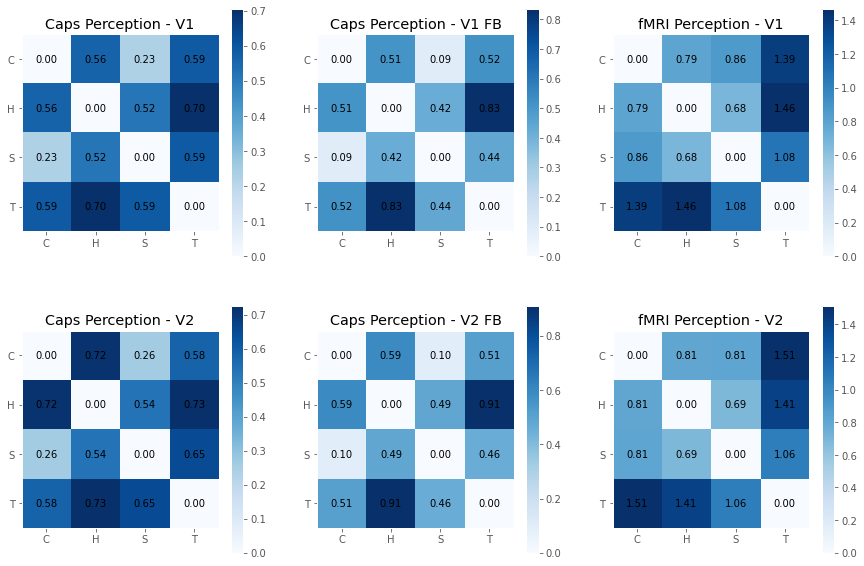

In [44]:
names = ['Caps Perception - V1', 'Caps Perception - V2',  'Caps Perception - V1 FB', 'Caps Perception - V2 FB', 'fMRI Perception - V1', 'fMRI Perception - V2']
#'Caps Perception - V3', 'Caps Perception - V3 FB'
index = 0

fig = plt.figure(figsize = (15,10))
#fig.suptitle('Capsule Network Activation RDMs for Perception', fontsize=16)
plt.style.use('ggplot')
subplot_positions = [1,4,2,5,3,6]

#data_rdm_V3_caps_perc, data_rdm_V3_caps_perc_inv
for dataset in [data_rdm_V1_caps_perc, data_rdm_V2_caps_perc, data_rdm_V1_caps_perc_inv, data_rdm_V2_caps_perc_inv, data_rdm_V1_perc, data_rdm_V2_perc]:
    rdms = rsatoolbox.rdm.calc_rdm(dataset, method = 'correlation')
    diss = rdms.dissimilarities[0]
    diff = np.array([np.array([0, diss[0], diss[1], diss[2]]),np.array([0, 0, diss[3], diss[4]]), np.array([0,0,0, diss[5]]),np.array([0,0,0,0])])
    X= diff
    X = X + X.T - np.diag(np.diag(X))
    
    ax1 = plt.subplot(2, 3, subplot_positions[index])
    plt.imshow(X, cmap='Blues')
    for (i, j), z in np.ndenumerate(X):
      ax1.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

    plt.axis('on')
    ax1.set_xticks([0,1,2,3])
    ax1.set_yticks([0,1,2,3])
    ax1.title.set_text(names[index])
    ax1.set_xticklabels(['C', 'H', 'S', 'T'])
    ax1.set_yticklabels(['C', 'H', 'S', 'T'])
    plt.colorbar()
    plt.grid(False)

    index += 1

RDM patterns for fMRI Imagery acitvations (V1, V2) and accordingly, RDM patterns for CapsActivations during the Imagery trials reconstructed from Imagery higher level area activation (V1, V2).  

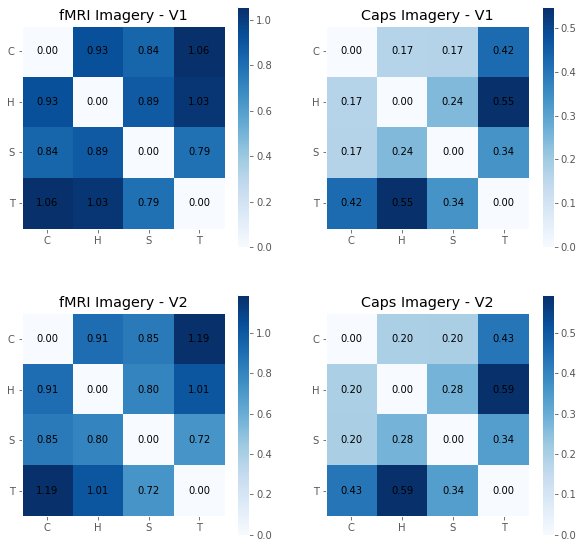

In [45]:
names = ['fMRI Imagery - V1', 'fMRI Imagery - V2', 'Caps Imagery - V1', 'Caps Imagery - V2']
#'fMRI Imagery - V3', 
#, 'Caps Imagery - V3'

fig = plt.figure(figsize = (10,15))
plt.style.use('ggplot')
subplot_positions = [1,3,2,4]
index = 0
for dataset in [data_rdm_V1, data_rdm_V2, data_rdm_V1_caps, data_rdm_V2_caps]: #data_rdm_V3, data_rdm_V3_caps
    rdms = rsatoolbox.rdm.calc_rdm(dataset, method = 'correlation')
    diss = rdms.dissimilarities[0]
    diff = np.array([np.array([0, diss[0], diss[1], diss[2]]),np.array([0, 0, diss[3], diss[4]]), np.array([0,0,0, diss[5]]),np.array([0,0,0,0])])
    X = diff
    X = X + X.T - np.diag(np.diag(X))
    
    ax1 = plt.subplot(3, 2, subplot_positions[index])
    for (i, j), z in np.ndenumerate(X):
      ax1.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
    plt.imshow(X, cmap='Blues')
    plt.axis('on')
    ax1.set_xticks([0,1,2,3])
    ax1.set_yticks([0,1,2,3])
    ax1.title.set_text(names[index])
    ax1.set_xticklabels(['C', 'H', 'S', 'T'])
    ax1.set_yticklabels(['C', 'H', 'S', 'T'])
    plt.colorbar()
    plt.grid(False)

    index += 1

RDMs for reconstructed images from Imagery and Perception with pRF mapping and autoencoder usage.

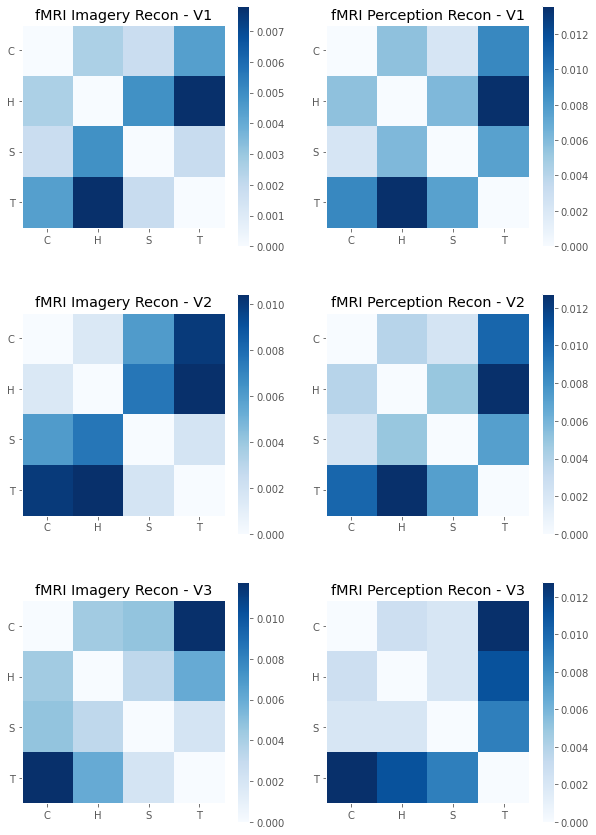

In [46]:
names = ['fMRI Imagery Recon - V1', 'fMRI Imagery Recon - V2', 'fMRI Imagery Recon - V3', 'fMRI Perception Recon - V1', 'fMRI Perception Recon - V2', 'fMRI Perception Recon - V3']
fig = plt.figure(figsize = (10,15))
plt.style.use('ggplot')
subplot_positions = [1,3,5,2,4,6]
index = 0
for dataset in [data_rdm_V1_recon, data_rdm_V2_recon, data_rdm_V3_recon, data_rdm_V1_perc_recon, data_rdm_V2_perc_recon, data_rdm_V3_perc_recon]:
    rdms = rsatoolbox.rdm.calc_rdm(dataset)
    diss = rdms.dissimilarities[0]
    diff = np.array([np.array([0, diss[0], diss[1], diss[2]]),np.array([0, 0, diss[3], diss[4]]), np.array([0,0,0, diss[5]]),np.array([0,0,0,0])])
    X= diff
    X = X + X.T - np.diag(np.diag(X))
    
    ax1 = plt.subplot(3, 2, subplot_positions[index])
    plt.imshow(X, cmap='Blues')
    plt.axis('on')
    ax1.set_xticks([0,1,2,3])
    ax1.set_yticks([0,1,2,3])
    ax1.title.set_text(names[index])
    ax1.set_xticklabels(['C', 'H', 'S', 'T'])
    ax1.set_yticklabels(['C', 'H', 'S', 'T'])
    plt.colorbar()
    plt.grid(False)

    index += 1


#for dataset in [data_rdm_V1_recon, data_rdm_V2_recon, data_rdm_V3_recon, data_rdm_V1_perc_recon, data_rdm_V2_perc_recon, data_rdm_V3_perc_recon]:
#    rdms = rsatoolbox.rdm.calc_rdm(dataset)
#    rsatoolbox.vis.show_rdm(rdms, 
#             rdm_descriptor = names[index],
#             show_colorbar='figure',
#             pattern_descriptor= 'index')
#    index += 1

RDM for activation patterns during perception in fMRI:

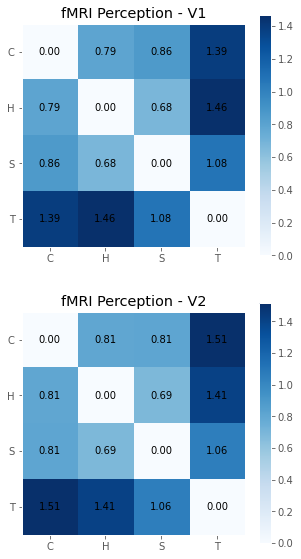

In [47]:
names = ['fMRI Perception - V1', 'fMRI Perception - V2'] #'fMRI Perception - V3'

fig = plt.figure(figsize = (5,15))
plt.style.use('ggplot')
index = 0
for dataset in [data_rdm_V1_perc, data_rdm_V2_perc]: #, data_rdm_V3_perc
    rdms = rsatoolbox.rdm.calc_rdm(dataset, method = 'correlation')
    diss = rdms.dissimilarities[0]
    diff = np.array([np.array([0, diss[0], diss[1], diss[2]]),np.array([0, 0, diss[3], diss[4]]), np.array([0,0,0, diss[5]]),np.array([0,0,0,0])])
    X= diff
    X = X + X.T - np.diag(np.diag(X))
    
    ax1 = plt.subplot(3, 1, index+1)
    for (i, j), z in np.ndenumerate(X):
      ax1.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

    plt.imshow(X, cmap='Blues')
    plt.axis('on')
    ax1.set_xticks([0,1,2,3])
    ax1.set_yticks([0,1,2,3])
    ax1.title.set_text(names[index])
    ax1.set_xticklabels(['C', 'H', 'S', 'T'])
    ax1.set_yticklabels(['C', 'H', 'S', 'T'])
    plt.colorbar()
    plt.grid(False)

    index += 1

#index = 0
#for dataset in [data_rdm_V1_perc, data_rdm_V2_perc, data_rdm_V3_perc]:
#    rdms = rsatoolbox.rdm.calc_rdm(dataset)
#    rsatoolbox.vis.show_rdm(rdms, 
#             rdm_descriptor = names[index],
#             show_colorbar='figure',
#             pattern_descriptor= 'index')
#    index += 1

In [48]:
names_0 = ['Caps Perception - V1', 'Caps Perception - V2',  'Caps Perception - V1 FB', 'Caps Perception - V2 FB']
datasets_0 = [data_rdm_V1_caps_perc, data_rdm_V2_caps_perc, data_rdm_V1_caps_perc_inv, data_rdm_V2_caps_perc_inv]
#'Caps Perception - V3', 'Caps Perception - V3 FB'
#data_rdm_V3_caps_perc, data_rdm_V3_caps_perc_inv

names_1 = ['Caps Imagery - V1', 'Caps Imagery - V2', 'fMRI Imagery - V1', 'fMRI Imagery - V2' ]
datasets_1 = [data_rdm_V1_caps, data_rdm_V2_caps, data_rdm_V1, data_rdm_V2]
#'fMRI Imagery - V3', , 'Caps Imagery - V3'
# data_rdm_V3, , data_rdm_V3_caps

names_2 = ['fMRI Imagery Recon - V1', 'fMRI Imagery Recon - V2', 'fMRI Imagery Recon - V3', 'Caps Imagery - V1', 'Caps Imagery - V2', 'Caps Imagery - V3']
datasets_2 = [data_rdm_V1_recon, data_rdm_V2_recon, data_rdm_V3_recon, data_rdm_V1_caps, data_rdm_V2_caps, data_rdm_V3_caps]

names_3 = ['fMRI Imagery Recon - V1', 'fMRI Imagery Recon - V2', 'fMRI Imagery Recon - V3', 'Caps Perception - V1 FB', 'Caps Perception - V2 FB', 'Caps Perception - V3 FB']
datasets_3 = [data_rdm_V1_recon, data_rdm_V2_recon, data_rdm_V3_recon, data_rdm_V1_caps_perc_inv, data_rdm_V2_caps_perc_inv, data_rdm_V3_caps_perc_inv]
#

names_4 = ['fMRI Perception Recon - V1', 'fMRI Perception Recon - V2', 'fMRI Perception Recon - V3', 'Caps Perception - V1', 'Caps Perception - V2', 'Caps Perception - V3']
datasets_4 = [data_rdm_V1_perc_recon, data_rdm_V2_perc_recon, data_rdm_V3_perc_recon, data_rdm_V1_caps_perc, data_rdm_V2_caps_perc, data_rdm_V3_caps_perc]
#

names_5 = ['Caps Perception - V1', 'Caps Perception - V2', 'Caps Perception - V1 FB', 'Caps Perception - V2 FB', 'fMRI Perception - V1', 'fMRI Perception - V2', 'fMRI Imagery - V1', 'fMRI Imagery - V2'] #, 'Caps Perception - V3'
datasets_5 = [data_rdm_V1_caps_perc, data_rdm_V2_caps_perc, data_rdm_V1_caps_perc_inv, data_rdm_V2_caps_perc_inv, data_rdm_V1_perc, data_rdm_V2_perc, data_rdm_V1, data_rdm_V2] #, data_rdm_V3_caps_perc
#'fMRI Perception - V3', data_rdm_V3_perc, 

#comparisons = rsatoolbox.rdm.compare(rdms_V1, rdms_V1_caps, method='corr')

Calculate RSA values for multiple data sets at a time and display.

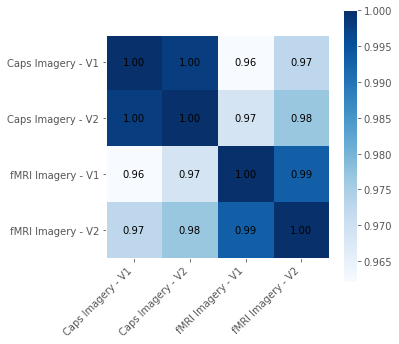

In [49]:
name_list = [ names_1] #,  names_0, names_2, names_3, names_4, names_1,
dataset_list = [datasets_1] # datasets_0, datasets_2, datasets_3, datasets_4, datasets_1, 

for names, datasets in zip(name_list, dataset_list):
  comparisons = np.zeros((len(datasets),len(datasets)))
  index = 0
  for set in datasets:
    globals()["rdms_" + str(index)] = rsatoolbox.rdm.calc_rdm(set)
    index += 1

  for rdm_one in range(len(datasets)):
    for rdm_two in range(len(datasets)):
      comparisons[rdm_one][rdm_two] = rsatoolbox.rdm.compare(globals()["rdms_" + str(rdm_one)], globals()["rdms_" + str(rdm_two)])

  plt.style.use('ggplot')
  fig, ax = plt.subplots(1,1, figsize = (5,5))
  img = ax.imshow(comparisons, cmap='Blues')
  for (i, j), z in np.ndenumerate(comparisons):
     ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
  x_label_list = names
  plt.xticks(rotation=45, ha="right")
  ax.set_xticks([0,1,2,3]) #4,5
  ax.set_xticklabels(x_label_list)
  plt.grid(None) 

  ax.set_yticks([0,1,2,3]) #4,5
  ax.set_yticklabels(x_label_list)
  fig.colorbar(img)
  #print(comparisons)

# Spatial Correlation Analysis

Besides the RDM analysis, also a spatial correlation analysis is done. For that purpose parts of the capsule activations need to be extracted and rescaled.

In [50]:
!pip install sewar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sewar: filename=sewar-0.4.5-py3-none-any.whl size=10608 sha256=28918520abca38d20d6fbf2c4311dcc99e52b8355c7ad7ebedb76c0a356a9bec
  Stored in directory: /root/.cache/pip/wheels/7a/38/6b/d066cfcb2b1c1c9b059b9ce1bdc4803b469359214e8dad4e3e
Successfully built sewar


In [51]:
import PIL
import sewar
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp

In [52]:
!pip install researchpy

from PIL import ImageChops, Image
import math, operator
from matplotlib import pyplot
from skimage.metrics import structural_similarity as ssim
import cv2
import argparse
from astropy.table import QTable
from numpy import *
from scipy.spatial.distance import pdist, squareform
import pandas as pd
#from pandas import *
import researchpy as rp
import scipy.stats as stats
import os
import sys

#dcov, dvar,cent_dist_dcor to calculate distance correlation between two matrices https://en.wikipedia.org/wiki/Distance_correlation
def dcov(X, Y):
    #Computes the distance covariance between matrices X and Y.
    n = X.shape[0]
    XY = np.multiply(X, Y)
    cov = np.sqrt(XY.sum()) / n
    return cov

def dvar(X):
    #Computes the distance variance of a matrix X
    return np.sqrt(np.sum(X ** 2 / X.shape[0] ** 2))

def cent_dist(X):
    #Computes the pairwise euclidean distance between rows of X and centers
    #each cell of the distance matrix with row mean, column mean, and grand mean
    M = squareform(pdist(X))    # distance matrix
    rmean = M.mean(axis=1)
    cmean = M.mean(axis=0)
    gmean = rmean.mean()
    R = np.tile(rmean, (M.shape[0], 1)).transpose()
    C = np.tile(cmean, (M.shape[1], 1))
    G = np.tile(gmean, M.shape)
    CM = M - R - C + G
    return CM

def dcor(X, Y):
    #Computes the distance correlation between two matrices X and Y.
    #X and Y must have the same number of rows.
    #>>> X = np.matrix('1;2;3;4;5')
    #>>> Y = np.matrix('1;2;9;4;4')
    #>>> dcor(X, Y)
    #0.76267624241686649
    assert X.shape[0] == Y.shape[0]
    A = cent_dist(X)
    B = cent_dist(Y)
    dcov_AB = dcov(A, B)
    dvar_A = dvar(A)
    dvar_B = dvar(B)
    dcor = 0.0
    if dvar_A > 0.0 and dvar_B > 0.0:
        dcor = dcov_AB / np.sqrt(dvar_A * dvar_B)
    return dcor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Correlate the capsule V1 imagery reconstructions with the V1 reconstructions from fMRI. Also correlate the reconstructions from perception capsules with fMRI imagery. 

In [53]:
cor_imagery_V1 = np.zeros((4,4))

for idx, image in enumerate([V1_c_imagery_caps_av, V1_h_imagery_caps_av, V1_s_imagery_caps_av, V1_t_imagery_caps_av]):
  V1_c = image.reshape((224,224))
  #plt.imshow(V1_c[80:150, 100:170])
  PIL_im = PIL.Image.fromarray(V1_c[87:142, 110:165])
  PIL_im = PIL_im.resize((150,150))
  for idx_2, fMRI in enumerate([V1_recon_c_av, V1_recon_h_av, V1_recon_s_av, V1_recon_t_av]):
    cor_imagery_V1[idx][idx_2] = dcor(np.array(PIL_im), fMRI.reshape(150,150).transpose())

cor_perc_V1_FB = np.zeros((4,4))
cor_imagery_V1_FB = np.zeros((4,4))
for idx, image in enumerate([V1_c_perc_caps_inv, V1_h_perc_caps_inv, V1_s_perc_caps_inv, V1_t_perc_caps_inv]):
  V1_c = image.reshape((224,224))
  #plt.imshow(V1_c[80:150, 100:170])
  PIL_im = PIL.Image.fromarray(V1_c[87:142, 110:165])
  PIL_im = PIL_im.resize((150,150))
  for idx_2, fMRI in enumerate([V1_recon_c_av, V1_recon_h_av, V1_recon_s_av, V1_recon_t_av]):
    cor_imagery_V1_FB[idx][idx_2] = dcor(np.array(PIL_im), fMRI.reshape(150,150).transpose())
  for idx_3, fMRI_perc in enumerate([V1_perc_recon_c, V1_perc_recon_h, V1_perc_recon_s, V1_perc_recon_t]):
    cor_perc_V1_FB[idx][idx_3] = dcor(np.array(PIL_im), fMRI_perc.reshape(150,150).transpose())

In [54]:
print(cor_perc_V1_FB)

[[0.81208317 0.76171877 0.8596621  0.6636854 ]
 [0.88039846 0.83468408 0.76972836 0.65980745]
 [0.79927069 0.72256659 0.81366505 0.62495006]
 [0.78064773 0.80391267 0.82535994 0.90665894]]


Some tests for how thresholding might work.

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.35277605 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.36213631 0.36711881 0.37228333 ... 0.40979169 0.40476162 0.40012231]
 [0.36525712 0.3703721  0.37567046 ... 0.41106223 0.40594313 0.40121079]
 [0.36821066 0.37344776 0.37886976 ... 0.41206032 0.40685823 0.40203772]
 ...
 [0.22999564 0.22818157 0.22644037 ... 0.         0.         0.        ]
 [0.23423569 0.23244735 0.23072986 ... 0.         0.         0.        ]
 [0.23858505 0.23682442 0.23513226 ... 0.         0.         0.        ]]


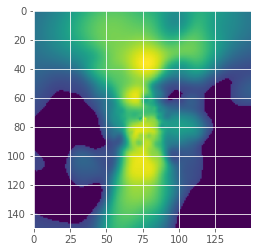

In [55]:
img = V1_t_imagery_caps_av
norm = (img - np.min(img)) / (np.max(img) - np.min(img))
V1_c = norm.reshape((224,224))
V1_c[V1_c < 0.35] = 0
itemindex = np.where(V1_c > 0)
print(V1_c[100:130, 100:150])
plt.imshow(V1_c[87:142, 110:165])

fmri = V1_recon_t_av
C_fmri = fmri.reshape(150,150).transpose()
img_fmri = C_fmri
C_fmri = (img_fmri - np.min(img_fmri)) / (np.max(img_fmri) - np.min(img_fmri))
C_fmri[C_fmri < 0.2] = 0
print(C_fmri)
plt.imshow(C_fmri)

This code gives the option to figure out the highest correlation possible depending on which frame size/position is used. This was eventually not used for the analysis but might be an interesting test for the future.

In [56]:
img = V1_s_imagery_caps_av
norm = (img - np.min(img)) / (np.max(img) - np.min(img))
V1_c = norm.reshape((224,224))
#plt.imshow(V1_c[80:150, 100:170])
max = 0

for x_lower in range(60,100):
  for x_upper in range(120,170):
    for y_lower in range(80, 120):
      for y_upper in range(150,190):
        if x_upper - x_lower == y_upper- y_lower:
          	PIL_im = PIL.Image.fromarray(V1_c[x_lower:x_upper, y_lower:y_upper])
          	PIL_im = PIL_im.resize((150,150))
          	#for number_low in [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.38, 0.4, 0.45]:
          	#  for number_high in [0.26, 0.28, 0.29, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.85, 0.9]:
          	T_fmri = np.copy(V1_recon_s_av.reshape(150,150).transpose())
          	img = T_fmri
          	T_fmri = (img - np.min(img)) / (np.max(img) - np.min(img))
          	#print(number_low,' ', number_high)
          	#T_fmri[T_fmri > number_high] = number_high
          	#T_fmri[T_fmri < number_low] = 0
          	#plt.imshow(T_fmri.reshape(150,150))
          	corr = dcor(np.array(PIL_im), T_fmri.reshape(150,150)) #float32 and float64, maybe fix at some point
          	#ssim = ssim(np.array(PIL_im), T_fmri.reshape(150,150))
          	if corr> max:
          	  max = corr
          	  find = [x_lower, x_upper, y_lower, y_upper] #number_low, number_high
          	  print(max, find)

#results = PIL.Image.fromarray(V1_c[find[0]:find[1], find[2]:find[3]])
#plt.imshow(results)

0.7319027773322639 [60, 120, 90, 150]
0.732078179285005 [60, 120, 109, 169]
0.7330374701527811 [60, 120, 110, 170]
0.7341722663951865 [60, 120, 111, 171]
0.7353171966316516 [60, 120, 112, 172]
0.7364999738945102 [60, 120, 113, 173]
0.7375720260139627 [60, 120, 114, 174]
0.7386734213633681 [60, 120, 115, 175]
0.7396950443233584 [60, 120, 116, 176]
0.7407277294508542 [60, 120, 117, 177]
0.7417065259597143 [60, 120, 118, 178]
0.7426011249364958 [60, 120, 119, 179]
0.7426192326792073 [62, 162, 82, 182]
0.7427971881207175 [62, 162, 83, 183]
0.7429405617601438 [62, 162, 84, 184]
0.7430541944883482 [62, 162, 85, 185]
0.7431436894072506 [62, 162, 86, 186]
0.7432108917509341 [62, 162, 87, 187]
0.7432583747736508 [62, 162, 88, 188]
0.743292619578677 [62, 162, 89, 189]
0.7437278689632973 [62, 163, 80, 181]
0.7438974960182927 [62, 163, 81, 182]
0.744032581535952 [62, 163, 82, 183]
0.7441815669383357 [62, 163, 83, 184]
0.744260023006884 [62, 163, 84, 185]
0.7443444058659308 [62, 163, 85, 186]
0.744

Now correlate the capsule reconstructions from imagery for each letter stimulus with the fMRI activation patterns of V1.

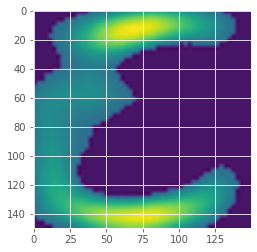

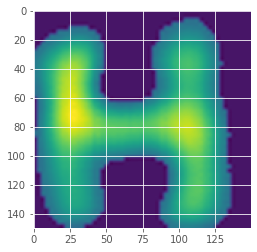

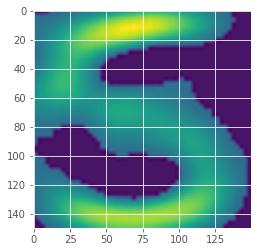

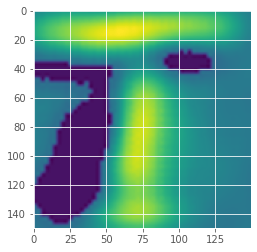

In [57]:
#best values that were found for each letter separately
# c = [68, 131, 107, 170]
# t = [95, 126, 119, 150]
# h = [75, 120, 119, 164]
# s = [86, 120, 116, 150]
#[87:142, 110:165]
#general 80:150, 100:170
x_lower = 87
x_upper = 142
y_lower = 110
y_upper = 165
#number_high= 0.7
#number_low = 0.15

#80:150, 100:170
corr = np.zeros((4,4))
for count_1, img in enumerate([V1_c_perc_caps_inv, V1_h_perc_caps_inv, V1_s_perc_caps_inv, V1_t_perc_caps_inv]):
  norm = (img - np.min(img)) / (np.max(img) - np.min(img))
  V1_c = norm.reshape((224,224))
  V1_c[V1_c < 0.3] = 0
  #plt.imshow(V1_c[80:150, 100:170])
  PIL_im = PIL.Image.fromarray(V1_c[x_lower:x_upper, y_lower:y_upper])
  PIL_im = PIL_im.resize((150,150))
  for count_2, fmri in enumerate([V1_perc_recon_c, V1_perc_recon_h, V1_perc_recon_s, V1_perc_recon_t]):
    C_fmri = fmri.reshape(150,150).transpose()
    img_fmri = C_fmri
    C_fmri = (img_fmri - np.min(img_fmri)) / (np.max(img_fmri) - np.min(img_fmri))
    C_fmri[C_fmri < 0.2] = 0
    #C_fmri[C_fmri > number_high] = number_high
    #C_fmri[C_fmri < number_low] = 0
    corr[count_1, count_2] = dcor(np.array(PIL_im), C_fmri.reshape(150,150))
    plt.imshow
  plt.imshow(np.array(PIL_im))
  plt.show()
    #imagery activation correlated with each capsule activation

In [58]:
print(corr) # correlation matrix for each fMRI letter with each letter stimulus
print(corr[0,2])

[[0.81962218 0.77228206 0.8905209  0.70917515]
 [0.88641492 0.81771519 0.78021426 0.67860263]
 [0.77489455 0.70769205 0.80898287 0.61571729]
 [0.81714458 0.81142321 0.86366991 0.88635515]]
0.8905209045595404


Read in the letter stimuli that were presented during the experiment.

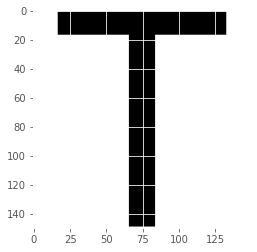

In [59]:
per_dir = "/content/drive/My Drive/CapsNets/Presented stimuli/"

im_h = plt.imread(f'{per_dir}/letH.png')
im_s = plt.imread(f'{per_dir}/letS.png')
im_t = plt.imread(f'{per_dir}/letT.png')
im_c = plt.imread(f'{per_dir}/letC.png')

from PIL import Image, ImageDraw, ImageFilter
pictures = [im_c, im_h, im_s, im_t]
y_pics = [0, 1, 2, 3]
letter_array = np.empty((0,150,150))
empty_template = np.zeros((150,150))
PIL_empty = Image.fromarray(np.uint8(empty_template))

for variable in range(len(pictures)):
  sample = pictures[variable][:,:,0]
  P = Image.fromarray(sample)
  P = P.resize((150,150), resample = Image.BILINEAR)
  back_im = PIL_empty.copy()
  back_im.paste(P, (0,0))
  P = np.array(back_im)
  P = np.array(P)
  letter_array = np.append(letter_array, P.reshape(1,150,150), axis = 0)

np.shape(letter_array)
plt.imshow(letter_array[3,:,:], cmap="binary")

In [60]:
print(cor_imagery_V1)
print(cor_perc_V1_FB)

[[0.89895498 0.82754223 0.85822999 0.73442182]
 [0.89768952 0.87991421 0.82685431 0.70314766]
 [0.88830526 0.68741642 0.87039602 0.64755514]
 [0.80012274 0.69327858 0.79429153 0.85968051]]
[[0.81208317 0.76171877 0.8596621  0.6636854 ]
 [0.88039846 0.83468408 0.76972836 0.65980745]
 [0.79927069 0.72256659 0.81366505 0.62495006]
 [0.78064773 0.80391267 0.82535994 0.90665894]]


Correlate fMRI activation patterns with the reconstructions from CapsNet.

In [61]:
cor_imagery_V2 = np.zeros((4,4))

for idx, image in enumerate([V2_c_imagery_caps_av, V2_h_imagery_caps_av, V2_s_imagery_caps_av, V2_t_imagery_caps_av]):
  V2_c = image.reshape((56,56,64))
  V2_c = np.mean(V2_c,axis = 2)
  #plt.imshow(V2_c[19:37, 24:42])
  PIL_im = PIL.Image.fromarray(V2_c[19:37, 24:42])
  PIL_im = PIL_im.resize((150,150))
  for idx_2, fMRI in enumerate([V2_recon_c_av, V2_recon_h_av, V2_recon_s_av, V2_recon_t_av]):
    cor_imagery_V2[idx][idx_2] = dcor(np.array(PIL_im), fMRI.reshape(150,150).transpose())

cor_perc_V2_FB = np.zeros((4,4))
cor_ima_V2_FB = np.zeros((4,4))
for idx, image in enumerate([V2_c_perc_caps_inv, V2_h_perc_caps_inv, V2_s_perc_caps_inv, V2_t_perc_caps_inv]):
  V2_c = image.reshape((56,56,64))
  V2_c = np.mean(V2_c,axis = 2)
  #plt.imshow(V2_c[19:37, 24:42])
  PIL_im = PIL.Image.fromarray(V2_c[19:37, 24:42])
  PIL_im = PIL_im.resize((150,150))
  for idx_2, fMRI in enumerate([V2_perc_recon_c, V2_perc_recon_h, V2_perc_recon_s, V2_perc_recon_t]):
    cor_perc_V2_FB[idx][idx_2] = dcor(np.array(PIL_im), fMRI.reshape(150,150).transpose())
  for idx_2, fMRI in enumerate([V2_recon_c_av, V2_recon_h_av, V2_recon_s_av, V2_recon_t_av]):
    cor_ima_V2_FB[idx][idx_2] = dcor(np.array(PIL_im), fMRI.reshape(150,150).transpose())

In [62]:
print(cor_imagery_V2)
print(cor_perc_V2_FB)
print(cor_ima_V2_FB)

[[0.83443144 0.68116682 0.78132602 0.69757187]
 [0.91442329 0.8083675  0.84576784 0.81473749]
 [0.70276813 0.59571757 0.68378041 0.59935179]
 [0.56859482 0.54431781 0.61268279 0.56559917]]
[[0.61506278 0.52867685 0.64227237 0.52266265]
 [0.87176575 0.80757696 0.86692765 0.71374729]
 [0.57732236 0.52445713 0.62067144 0.49206336]
 [0.72471839 0.73865538 0.74184523 0.78511475]]
[[0.59185383 0.51730141 0.57860067 0.50204581]
 [0.86580958 0.7784757  0.76891378 0.7445255 ]
 [0.56473385 0.51388055 0.60539947 0.49115836]
 [0.77537603 0.71723575 0.69866528 0.73800253]]


In [63]:
cor_imagery_V3 = np.zeros((4,4))
for idx, image in enumerate([V3_c_imagery_caps_av, V3_h_imagery_caps_av, V3_s_imagery_caps_av, V3_t_imagery_caps_av]):
  V3_c = image.reshape((27,27,128))
  V3_c = np.mean(V3_c,axis = 2)
  #plt.imshow(V3_c[10:19, 12:20])
  PIL_im = PIL.Image.fromarray(V3_c[10:19, 12:20])
  PIL_im = PIL_im.resize((150,150))
  for idx_2, fMRI in enumerate([V3_recon_c_av, V3_recon_h_av, V3_recon_s_av, V3_recon_t_av]):
    cor_imagery_V3[idx][idx_2] = dcor(np.array(PIL_im), fMRI.reshape(150,150).transpose())

cor_perc_V3_FB = np.zeros((4,4))
for idx, image in enumerate([V3_c_perc_caps_inv, V3_h_perc_caps_inv, V3_s_perc_caps_inv, V3_t_perc_caps_inv]):
  V3_c = image.reshape((27,27,128))
  V3_c = np.mean(V3_c,axis = 2)
  #plt.imshow(V3_c[10:19, 12:20])
  PIL_im = PIL.Image.fromarray(V3_c[10:19, 12:20])
  PIL_im = PIL_im.resize((150,150))
  for idx_2, fMRI in enumerate([V3_perc_recon_c, V3_perc_recon_h, V3_perc_recon_s, V3_perc_recon_t]):
    cor_perc_V3_FB[idx][idx_2] = dcor(np.array(PIL_im), fMRI.reshape(150,150).transpose())

Now, correlate as well the reconstructions from fMRI activations during imagery with the CapsNet activations during perception. 

In [64]:
cor_perc_V1 = np.zeros((4,4))
for idx, image in enumerate([V1_c_perc_caps, V1_h_perc_caps, V1_s_perc_caps, V1_t_perc_caps]):
  V1_c = image.reshape((56,56,64))
  V1_c = np.mean(V1_c,axis = 2)
  #plt.imshow(V1_c[17:39, 23:43])
  PIL_im = PIL.Image.fromarray(V1_c[17:39, 23:43])
  PIL_im = PIL_im.resize((150,150))
  for idx_2, fMRI in enumerate([V1_recon_c_av, V1_recon_h_av, V1_recon_s_av, V1_recon_t_av]):
    cor_perc_V1[idx][idx_2] = dcor(np.array(PIL_im), fMRI.reshape(150,150).transpose())

In [65]:
print(cor_perc_V1)

[[0.82674728 0.70467591 0.74234386 0.54277106]
 [0.70026415 0.75774633 0.70511683 0.49782152]
 [0.78601868 0.57748667 0.84448996 0.53699966]
 [0.66688231 0.62754672 0.61556907 0.78008578]]


In [66]:
cor_perc_V2 = np.zeros((4,4))
for idx, image in enumerate([V2_c_perc_caps, V2_h_perc_caps, V2_s_perc_caps, V2_t_perc_caps]):
  V2_c = image.reshape((28,28,128))
  V2_c = np.mean(V2_c,axis = 2)
  #plt.imshow(V2_c[8:20, 10:22])
  PIL_im = PIL.Image.fromarray(V2_c[8:20, 10:22])
  PIL_im = PIL_im.resize((150,150))
  for idx_2, fMRI in enumerate([V2_recon_c_av, V2_recon_h_av, V2_recon_s_av, V2_recon_t_av]):
    cor_perc_V2[idx][idx_2] = dcor(np.array(PIL_im), fMRI.reshape(150,150).transpose())

In [67]:
print(cor_perc_V2)

[[0.64276755 0.71818845 0.59394657 0.54513876]
 [0.64884466 0.77714953 0.60689206 0.57185139]
 [0.7071865  0.53817657 0.7071469  0.56568974]
 [0.6282367  0.72796954 0.54661531 0.70463376]]


Feedforward activation patterns of the CapsNet correlated with the perception activation patterns of the fRMI.

In [68]:
cor_perc_V1 = np.zeros((4,4))
for idx, image in enumerate([V1_c_perc_caps, V1_h_perc_caps, V1_s_perc_caps, V1_t_perc_caps]):
  V1_c = image.reshape((56,56,64))
  V1_c = np.mean(V1_c,axis = 2)
  #plt.imshow(V1_c[17:39, 23:43])
  PIL_im = PIL.Image.fromarray(V1_c[17:39, 23:43])
  PIL_im = PIL_im.resize((150,150))
  for idx_2, fMRI in enumerate([V1_perc_recon_c, V1_perc_recon_h, V1_perc_recon_s, V1_perc_recon_t]):
    cor_perc_V1[idx][idx_2] = dcor(np.array(PIL_im), fMRI.reshape(150,150).transpose())

In [69]:
cor_perc_V2 = np.zeros((4,4))
for idx, image in enumerate([V2_c_perc_caps, V2_h_perc_caps, V2_s_perc_caps, V2_t_perc_caps]):
  V2_c = image.reshape((28,28,128))
  V2_c = np.mean(V2_c,axis = 2)
  #plt.imshow(V2_c[8:20, 10:22])
  PIL_im = PIL.Image.fromarray(V2_c[8:20, 10:22])
  PIL_im = PIL_im.resize((150,150))
  for idx_2, fMRI in enumerate([V2_perc_recon_c, V2_perc_recon_h, V2_perc_recon_s, V2_perc_recon_t]):
    cor_perc_V2[idx][idx_2] = dcor(np.array(PIL_im), fMRI.reshape(150,150).transpose())

In [70]:
print(cor_perc_V1)
print(cor_perc_V2)

[[0.87761502 0.71921577 0.78992517 0.57493979]
 [0.74218648 0.77941001 0.64617971 0.53880849]
 [0.70936689 0.64020568 0.83136926 0.53741484]
 [0.60425593 0.66119563 0.59872589 0.77397889]]
[[0.81939544 0.70525294 0.67494117 0.51889263]
 [0.7609774  0.77429513 0.60530833 0.52749849]
 [0.6959718  0.57429967 0.73545333 0.53179307]
 [0.60288774 0.70406328 0.56180568 0.81089971]]


In [71]:
cor_perc_V3 = np.zeros((4,4))
for idx, image in enumerate([V3_c_perc_caps, V3_h_perc_caps, V3_s_perc_caps, V3_t_perc_caps]):
  V3_c = image.reshape((20,20,256))
  V3_c = np.mean(V3_c,axis = 2)
  PIL_im = PIL.Image.fromarray(V3_c)
  PIL_im = PIL_im.resize((150,150))
  for idx_2, fMRI in enumerate([V3_perc_recon_c, V3_perc_recon_h, V3_perc_recon_s, V3_perc_recon_t]):
    cor_perc_V3[idx][idx_2] = dcor(np.array(PIL_im), fMRI.reshape(150,150).transpose())